In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("retail_sales_dataset.csv") 
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [5]:
print(df.columns)


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [7]:
group_male = df[df["Gender"] == "Male"]["Total Amount"].dropna()
group_female = df[df["Gender"] == "Female"]["Total Amount"].dropna()

In [11]:
t_stat, p_value = stats.ttest_ind(group_male, group_female, equal_var=False)  
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


T-Statistic: -0.0316
P-Value: 0.9748


In [13]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in sales between genders.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales.")


Fail to reject the null hypothesis: No significant difference in sales.


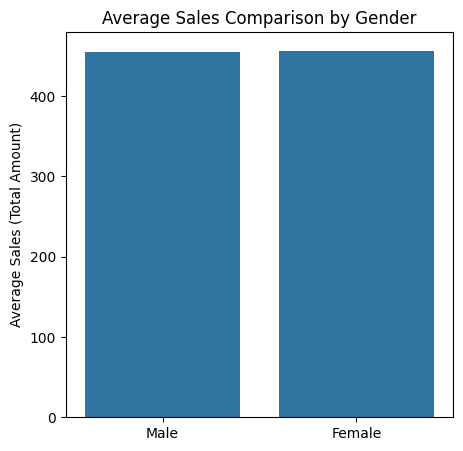

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(x=["Male", "Female"], y=[group_male.mean(), group_female.mean()], errorbar=("ci", 95))
plt.title("Average Sales Comparison by Gender")
plt.ylabel("Average Sales (Total Amount)")
plt.show()
